In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
class ODEsolver(Sequential):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    self.loss_tracker = keras.metrics.Mean(name = 'my_loss')

  @property
  def metrics(self):
    return [self.loss_tracker]

  def train_step(self, data):
    batch_size = tf.shape(data)[0]
    x = tf.random.uniform((batch_size, 1), minval = -2, maxval = 2)

    with tf.GradientTape() as tape:
      with tf.GradientTape(persistent = True) as g:
        g.watch(x)
        g.watch(x_o)
        with tf.GradientTape() as gg:
          gg.watch(x)
          y_pred = self(x, training = True)
        dy_dx = gg.gradient(y_pred, x)
      d2y_dx2 = g.gradient(dy_dx, x)
      x_o = tf.zeros((batch_size, 1))
      y_o = self(x_o, training = True)
      #dy_o = g.gradient(y_pred, x_o)
      eq = d2y_dx2 + y_pred
      ic1 = y_o - 1
      #ic2 = dy_o + 0.5
      loss = keras.losses.mean_squared_error(0., eq) + keras.losses.mean_squared_error(0., ic1) #+ keras.losses.mean_squared_error(0., ic2)      
             
          

    grads = tape.gradient(loss, self.trainable_variables)
    self.optimizer.apply_gradients(zip(grads, self.trainable_variables))

    self.loss_tracker.update_state(loss)

    return {'my_loss': self.loss_tracker.result()}

  

In [ ]:
model = ODEsolver()
model.add(Dense(10, activation = 'tanh', input_shape = (1,)))
model.add(Dense(8, activation = 'tanh'))
model.add(Dense(4, activation = 'tanh'))
model.add(Dense(1, activation = 'linear'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer = Adam(), metrics = ['my_loss'])

In [ ]:
x = tf.linspace(-2, 2, 100)
history = model.fit(x, epochs = 1000, verbose = 1)

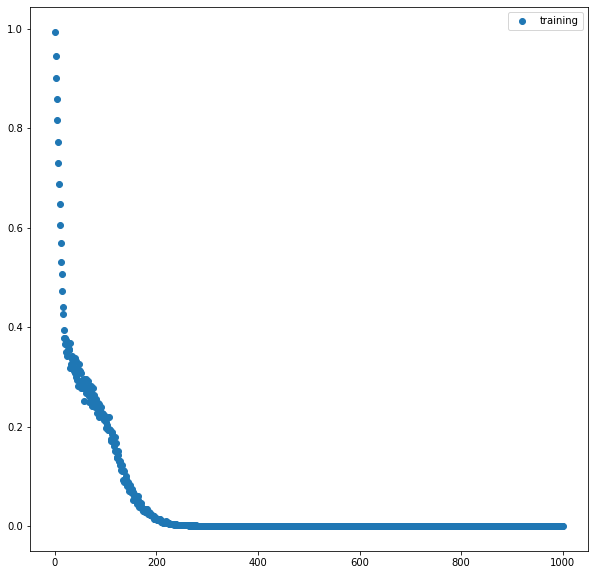

In [ ]:
history_dict = history.history
loss_values = history_dict['my_loss']


fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,loss_values, 'o',label='training')
plt.legend()
plt.show()

In [ ]:
def solution_2(x):
  return np.cos(x)



4/4 [==============================] - 0s 3ms/step


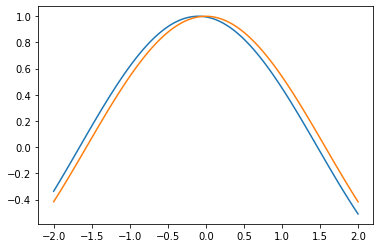

In [ ]:
x_test = tf.linspace(-2, 2, 100)
a = model.predict(x_test)
plt.plot(x_test, a)
plt.plot(x_test, solution_2(x_test))